In [21]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=123433 sha256=5a7a9746e9e7a40051391acd849545ce3b322aada8f1d661c02fa61fb1ca1bd6
  Stored in directory: /tmp/pip-ephem-wheel-cache-m3cy8e8s/wheels/a5/b6/52/18c617da8ab7981501f28a49d398fa4ccca532d1baece44b1e
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may 

In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.betweenness.volumes as vol
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "erdos4_nodes.sg",
                      path_links=path_directory + "erdos4_links.sg")
S.describe()

Nb of Nodes :  7
Nb of segmented nodes :  7.0
Nb of links :  18
Nb of segmented links :  28.0
Nb of event times :  27


In [2]:
bt.to_undirected(S)

<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


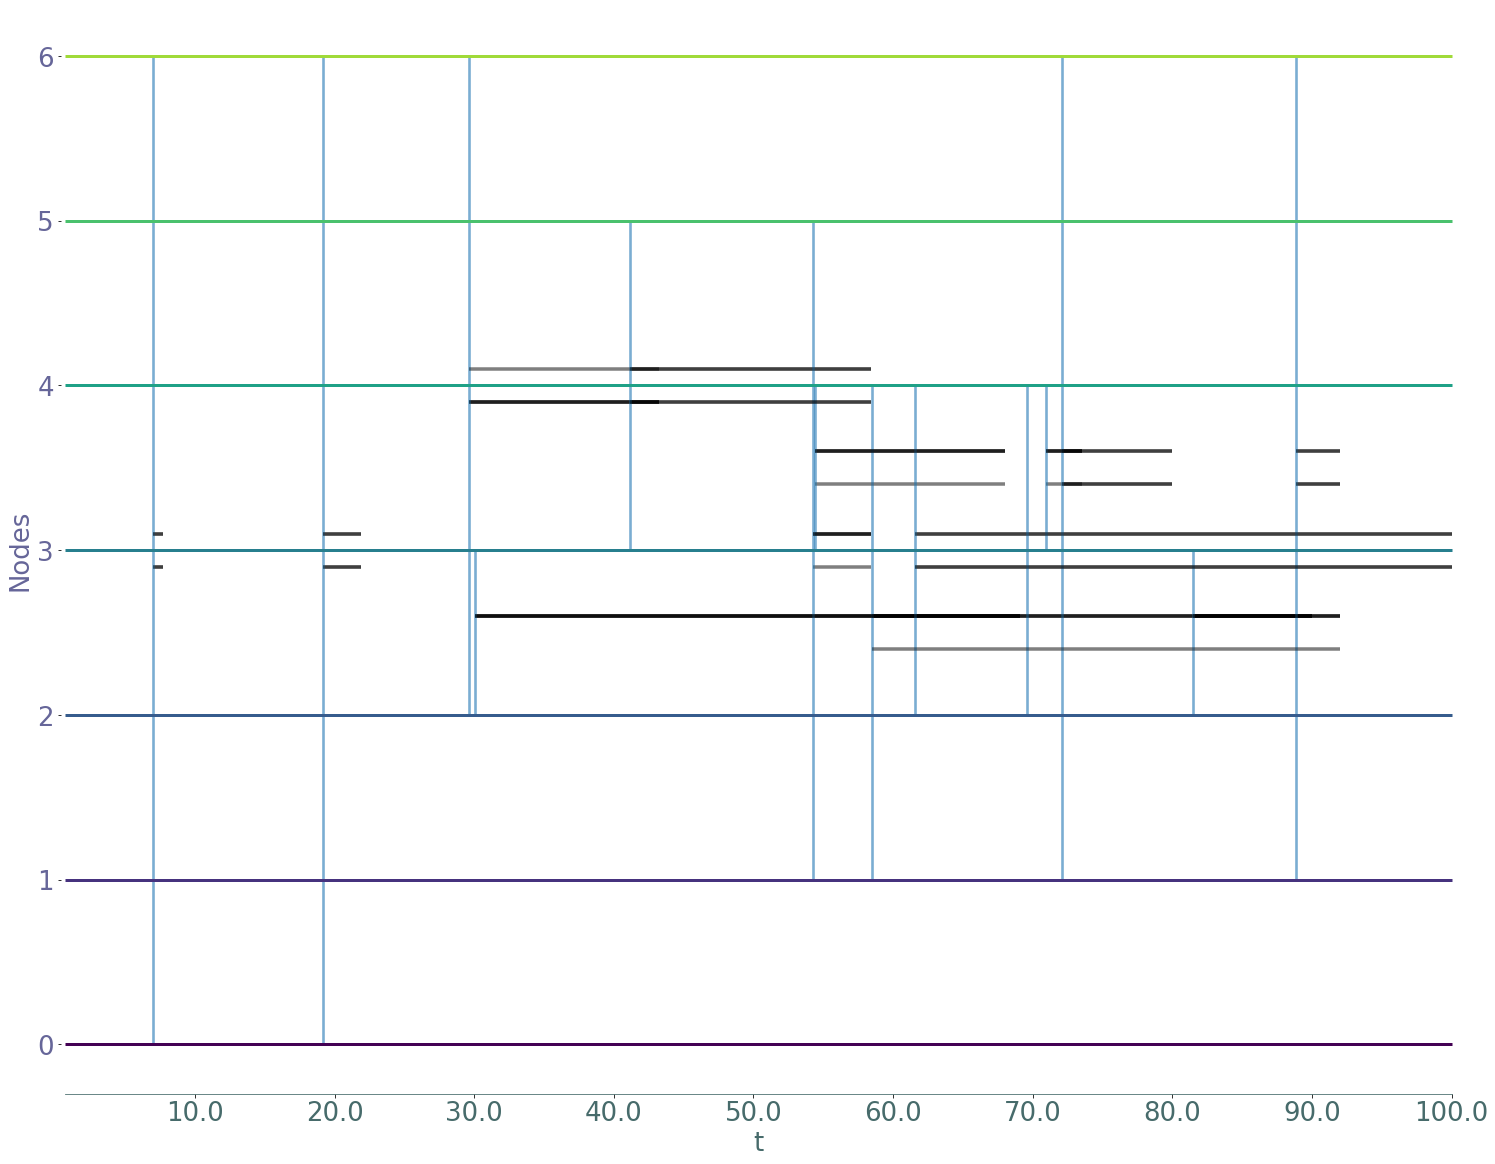

In [3]:
S.plot()

In [4]:
#for i in range(0,2*int(max(list(S.event_times())))):
#    S.add_point(i/2)
S.sg_to_streamfig("stream_example","eps")
nouveau = S.fragmented_stream_graph()

In [5]:
#nouveau.plot()
#plt.savefig("link_s_con.png",dpi=300,bbox_inches ='tight' )

In [6]:
events, events_reverse = bt.events_dic(nouveau)

In [7]:
link_ind = bt.link_index(nouveau)
neighbors, neighbors_inv = bt.neighbors_direct(nouveau)
unt = bt.until(nouveau, events, events_reverse)

In [8]:
node = 0

In [9]:
pre, cur_best = bt.dijkstra_directed(nouveau, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt)
cur_b_arr = bt. cur_best_to_array(nouveau, cur_best, events, events_reverse)

In [10]:
cur_best[5][43.20861816893123]

(21.858121399769864, 4)

In [11]:
lat = bt.latencies(nouveau, cur_b_arr, events, events_reverse)
lat_triplet, lat_rev_triplet = bt.latencies_without_0_and_rev(nouveau, lat, events)

In [12]:
lat_triplet[1]

[[21.858121399769864, 54.278643052149015, 5]]

In [13]:
G = bt.predecessor_graph(nouveau, pre,node)
GG = bt.graph_to_ordered(G, events, events_reverse)
Gp = bt.instant_graphs(G)
GT = bt.interval_graph(Gp)

********** (70.95868453710477, 72.13340058339028) **************
[(1, 72.13340058339028), (2, 29.60435405774298), (2, 30.066900040240178), (2, 41.18266119186523), (2, 43.20861816893123), (4, 72.13340058339028)]
///////////////////////
(4, 72.13340058339028) {} {(4, 72.13340058339028)}
(2, 43.20861816893123) {} {(2, 43.20861816893123)}
(4, 72.13340058339028) {} {(2, 43.20861816893123)}
(2, 41.18266119186523) {} {(2, 41.18266119186523)}
(4, 72.13340058339028) {} {(2, 41.18266119186523)}
(2, 30.066900040240178) {} {(2, 30.066900040240178)}
(4, 72.13340058339028) {} {(2, 30.066900040240178)}
(2, 29.60435405774298) {} {(2, 29.60435405774298)}
(4, 72.13340058339028) {} {(2, 29.60435405774298)}
(1, 72.13340058339028) {} {(1, 72.13340058339028)}
(4, 72.13340058339028) {} {(1, 72.13340058339028)}
********** (72.13340058339028, 73.50359888373906) **************
[(1, 72.13340058339028), (6, 21.858121399769864), (2, 29.60435405774298), (2, 30.066900040240178), (2, 41.18266119186523), (2, 43.208618

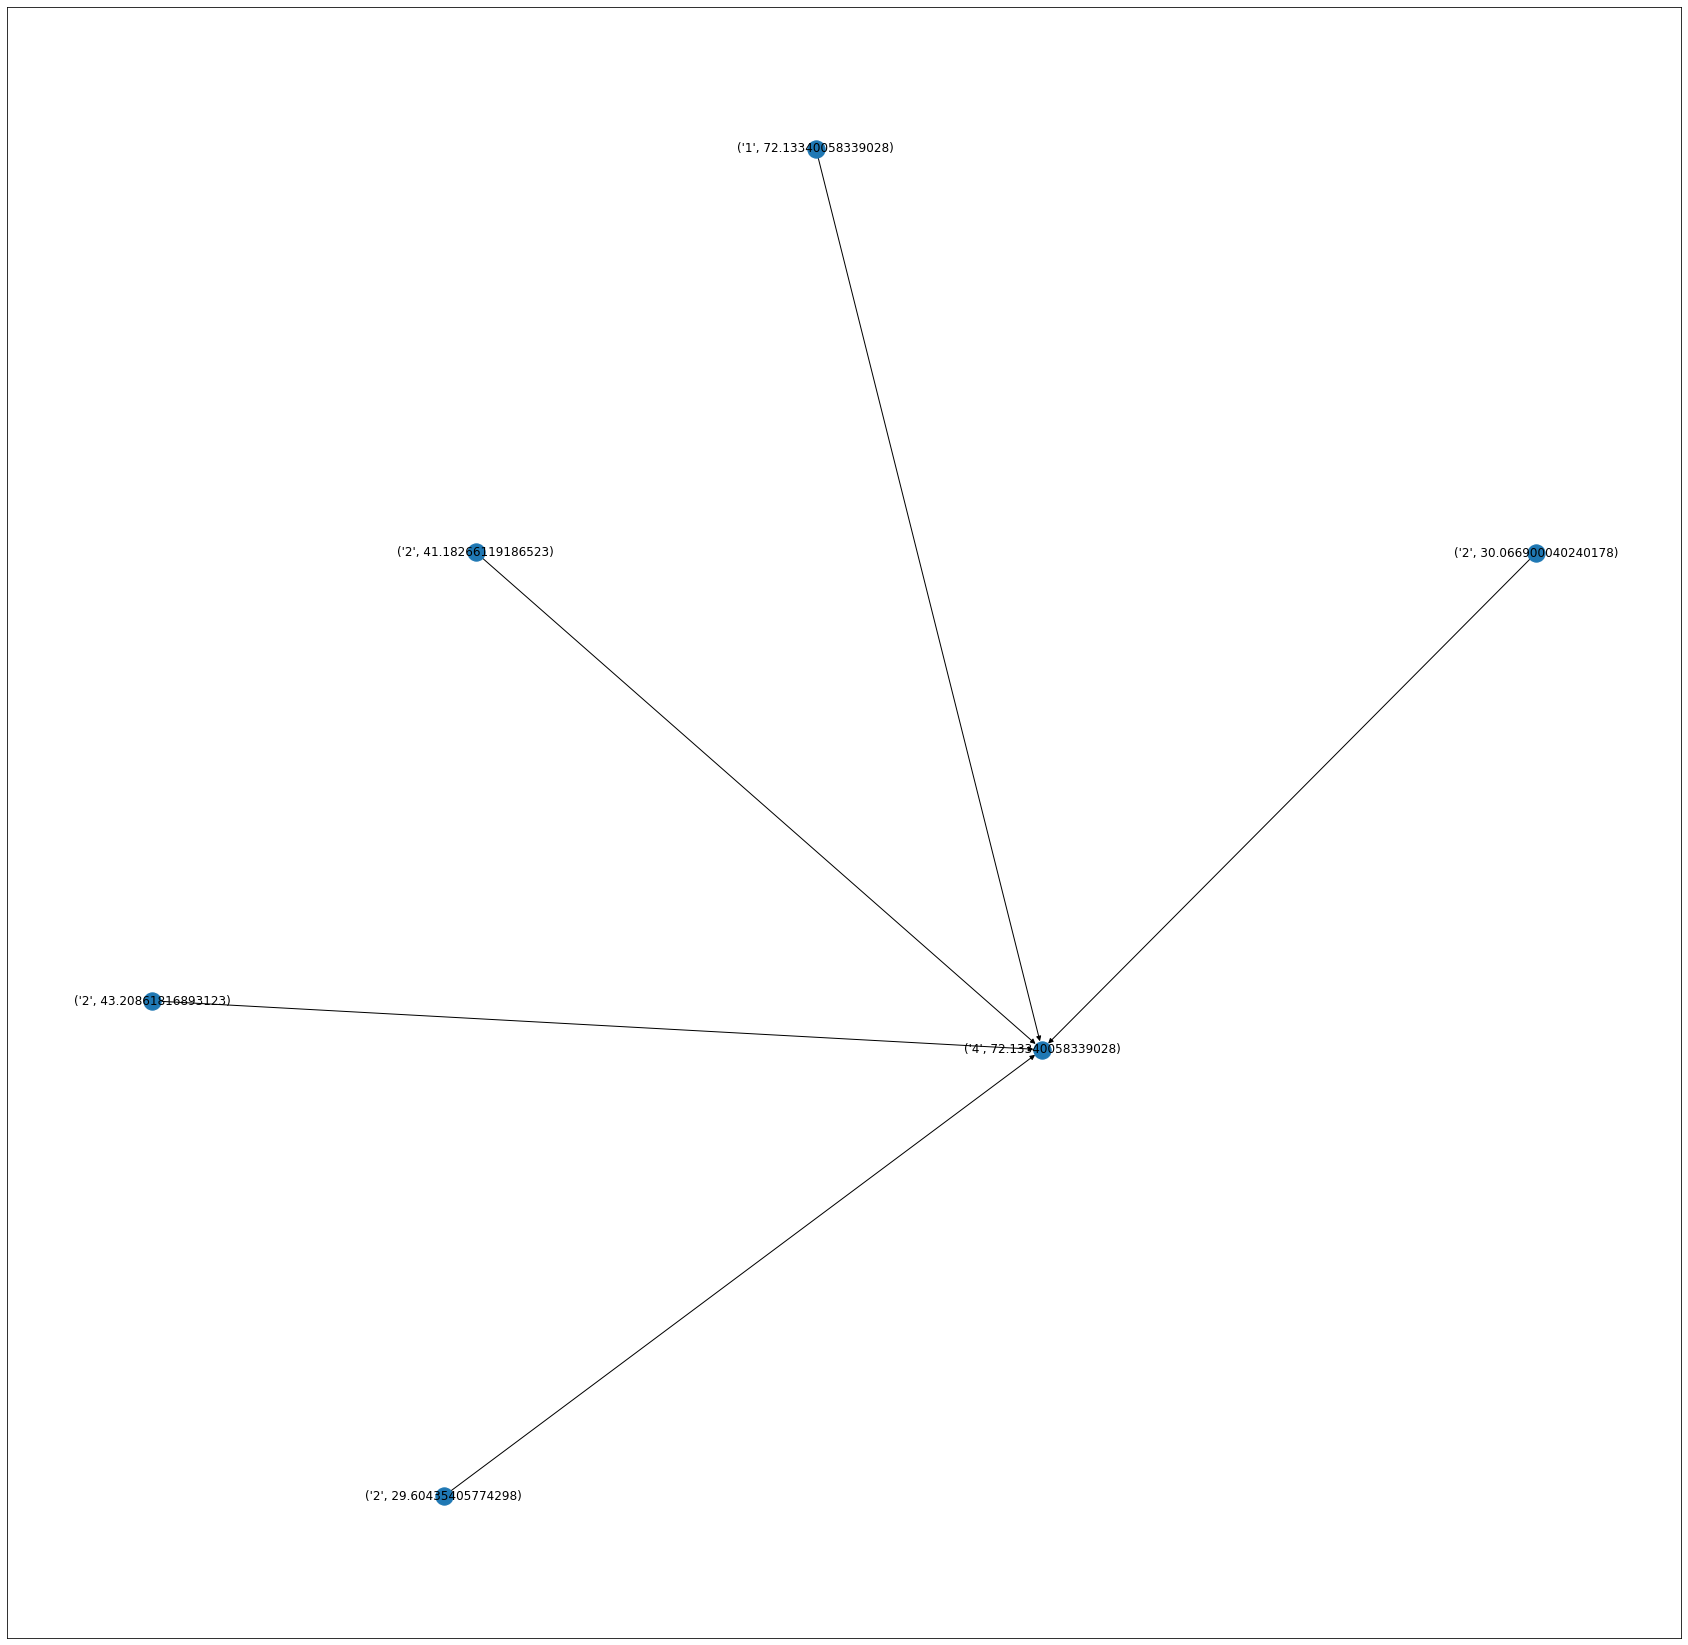

In [14]:
import networkx as nx
GD = Gp[(70.95868453710477, 72.13340058339028)].graph
ren = dict()
for e in GD.nodes:
    ren[e] = (nouveau.node_to_label[e[0]],e[1])
#print(ren)
GN =  nx.relabel_nodes(GD, ren, copy=True)
fig, ax = plt.subplots(figsize=(30,30))
nx.draw_networkx(GN,arrows=True,width = 1,ax = ax)

In [15]:
Gp[(41.18266119186523, 43.20861816893123)].graph[(6, 21.858121399769864)]

AtlasView({(2, 43.20861816893123): {'weight': 1}})

In [16]:
for e in Gp[(41.18266119186523, 43.20861816893123)].edges():
    print(e, Gp[(41.18266119186523, 43.20861816893123)].graph[e[0]][e[1]]['weight'])

((3, 30.066900040240178), (5, 43.20861816893123)) 1
((3, 41.18266119186523), (5, 43.20861816893123)) 1
((2, 29.60435405774298), (3, 43.20861816893123)) 1
((3, 43.20861816893123), (5, 43.20861816893123)) 1
((2, 30.066900040240178), (3, 43.20861816893123)) 1
((2, 41.18266119186523), (3, 43.20861816893123)) 1
((6, 21.858121399769864), (2, 43.20861816893123)) 1
((2, 43.20861816893123), (3, 43.20861816893123)) 1


In [17]:
Gp[(41.18266119186523, 43.20861816893123)].graph[(3, 43.20861816893123)]

AtlasView({(5, 43.20861816893123): {'weight': 1}})

In [18]:
Gp[(41.18266119186523, 43.20861816893123)].graph[(3, 43.20861816893123)]

AtlasView({(5, 43.20861816893123): {'weight': 1}})

In [19]:
GT[(41.18266119186523, 43.20861816893123)].graph[(6, 21.858121399769864)]

AtlasView({(2, 43.20861816893123): {'weight': 0}, (5, 43.20861816893123): {'weight': 2}, (3, 43.20861816893123): {'weight': 1}})

In [20]:
for e in GT[(41.18266119186523, 43.20861816893123)].edges():
    print(e)

((3, 30.066900040240178), (5, 43.20861816893123))
((3, 41.18266119186523), (5, 43.20861816893123))
((2, 29.60435405774298), (3, 43.20861816893123))
((2, 29.60435405774298), (5, 43.20861816893123))
((3, 43.20861816893123), (5, 43.20861816893123))
((2, 30.066900040240178), (3, 43.20861816893123))
((2, 30.066900040240178), (5, 43.20861816893123))
((2, 41.18266119186523), (3, 43.20861816893123))
((2, 41.18266119186523), (5, 43.20861816893123))
((6, 21.858121399769864), (2, 43.20861816893123))
((6, 21.858121399769864), (5, 43.20861816893123))
((6, 21.858121399769864), (3, 43.20861816893123))
((2, 43.20861816893123), (3, 43.20861816893123))
((2, 43.20861816893123), (5, 43.20861816893123))


In [21]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(5,43.20861816893123)):
        print(path)

[(0, 21.858121399769864), (6, 21.858121399769864), (2, 29.60435405774298), (3, 30.066900040240178), (5, 43.20861816893123)]
[(0, 21.858121399769864), (6, 21.858121399769864), (2, 29.60435405774298), (3, 41.18266119186523), (5, 43.20861816893123)]
[(0, 21.858121399769864), (6, 21.858121399769864), (2, 29.60435405774298), (3, 43.20861816893123), (5, 43.20861816893123)]
[(0, 21.858121399769864), (6, 21.858121399769864), (2, 30.066900040240178), (3, 30.066900040240178), (5, 43.20861816893123)]
[(0, 21.858121399769864), (6, 21.858121399769864), (2, 30.066900040240178), (3, 41.18266119186523), (5, 43.20861816893123)]
[(0, 21.858121399769864), (6, 21.858121399769864), (2, 30.066900040240178), (3, 43.20861816893123), (5, 43.20861816893123)]
[(0, 21.858121399769864), (6, 21.858121399769864), (2, 41.18266119186523), (3, 41.18266119186523), (5, 43.20861816893123)]
[(0, 21.858121399769864), (6, 21.858121399769864), (2, 41.18266119186523), (3, 43.20861816893123), (5, 43.20861816893123)]
[(0, 21.858

In [22]:
sigma_r[ (5, 43.20861816893123)]

NameError: name 'sigma_r' is not defined

In [23]:
GT[(86.96128165180458 ,87.50135191009633)].graph[(3, 86.96128165180458)]

KeyError: (86.96128165180458, 87.50135191009633)

In [24]:
GT[(86.96128165180458 ,87.50135191009633)].graph[(3, 86.96128165180458)]

KeyError: (86.96128165180458, 87.50135191009633)

In [25]:
cur_best[4]

{0.6834828486469102: (-inf, inf),
 7.019389720967818: (-inf, inf),
 7.6756378286387426: (-inf, inf),
 19.183559836963102: (-inf, inf),
 21.858121399769864: (-inf, inf),
 29.60435405774298: (-inf, inf),
 30.066900040240178: (-inf, inf),
 41.18266119186523: (-inf, inf),
 43.20861816893123: (-inf, inf),
 54.278643052149015: (-inf, inf),
 54.44303181777067: (21.858121399769864, 4),
 58.436696135020085: (21.858121399769864, 4),
 58.51067902088869: (21.858121399769864, 4),
 61.55169819227122: (21.858121399769864, 3),
 68.04041227484754: (21.858121399769864, 3),
 69.1274499599022: (21.858121399769864, 3),
 69.56169995221181: (21.858121399769864, 3),
 69.5706245894795: (21.858121399769864, 3),
 70.95868453710477: (21.858121399769864, 3),
 72.13340058339028: (21.858121399769864, 3),
 73.50359888373906: (21.858121399769864, 3),
 79.96710253478658: (21.858121399769864, 3),
 81.49450029381379: (21.858121399769864, 3),
 88.84119756031919: (21.858121399769864, 3),
 90.01182075351332: (21.85812139976

In [26]:
pre[0]

{0.6834828486469102: {},
 7.019389720967818: {(0, 0): (-1, -1)},
 7.6756378286387426: {(0, 0): (-1, -1)},
 19.183559836963102: {(0, 0): (-1, -1)},
 21.858121399769864: {(0, 0): (-1, -1)},
 29.60435405774298: {},
 30.066900040240178: {},
 41.18266119186523: {},
 43.20861816893123: {},
 54.278643052149015: {},
 54.44303181777067: {},
 58.436696135020085: {},
 58.51067902088869: {},
 61.55169819227122: {},
 68.04041227484754: {},
 69.1274499599022: {},
 69.56169995221181: {},
 69.5706245894795: {},
 70.95868453710477: {},
 72.13340058339028: {},
 73.50359888373906: {},
 79.96710253478658: {},
 81.49450029381379: {},
 88.84119756031919: {},
 90.01182075351332: {},
 92.02119665755635: {},
 100.0: {}}

In [27]:
nouveau.link_presence[2]

[7.019389720967818, 7.6756378286387426, 19.183559836963102, 21.858121399769864]

In [28]:
edge = bt.edges(nouveau)

In [29]:
edge[0][3]

KeyError: 3

In [30]:
edge[3][4]

{54.44303181777067: (54.44303181777067, 54.44303181777067),
 58.436696135020085: (54.44303181777067, 58.436696135020085),
 58.51067902088869: (58.436696135020085, 58.51067902088869),
 61.55169819227122: (58.51067902088869, 61.55169819227122),
 68.04041227484754: (61.55169819227122, 68.04041227484754),
 70.95868453710477: (70.95868453710477, 70.95868453710477),
 72.13340058339028: (70.95868453710477, 72.13340058339028),
 73.50359888373906: (72.13340058339028, 73.50359888373906)}

In [31]:
before, after = bt.volume_instantenuous(nouveau, G, events, events_reverse, edge)
mx = bt.max_volume_superposition(GT)
print(mx)

0 6 7.019389720967818 -1 -1 -1 -1
edge after 7.019389720967818 7.6756378286387426
t1p,t2p 7.019389720967818 7.019389720967818
0 6 7.6756378286387426 -1 -1 -1 -1
edge after 19.183559836963102 19.183559836963102
t1p,t2p 7.019389720967818 7.6756378286387426
0 6 19.183559836963102 -1 -1 -1 -1
edge after 19.183559836963102 21.858121399769864
t1p,t2p 19.183559836963102 19.183559836963102
0 6 21.858121399769864 -1 -1 -1 -1
t1p,t2p 19.183559836963102 21.858121399769864
6 1 21.858121399769864 19.183559836963102 21.858121399769864 -2 -1
edge after 72.13340058339028 73.50359888373906
t1p,t2p 72.13340058339028 72.13340058339028
6 1 21.858121399769864 19.183559836963102 21.858121399769864 -2 -1
edge after 73.50359888373906 79.96710253478658
t1p,t2p 72.13340058339028 73.50359888373906
6 1 21.858121399769864 19.183559836963102 21.858121399769864 -2 -1
t1p,t2p 73.50359888373906 79.96710253478658
6 1 21.858121399769864 19.183559836963102 21.858121399769864 -2 -1
edge after 88.84119756031919 90.01182075

In [32]:
for e in G.graph[(3,77.72417383674939)]:
    print(e)

KeyError: (3, 77.72417383674939)

In [33]:
G.graph[(3,77.72417383674939)][(1, 84.75277347981506)]

KeyError: (3, 77.72417383674939)

In [34]:
G.graph[(3,77.72417383674939)][(5, 84.75277347981506)]

KeyError: (3, 77.72417383674939)

In [35]:
after[4]

{0.6834828486469102: False,
 7.019389720967818: False,
 7.6756378286387426: False,
 19.183559836963102: False,
 21.858121399769864: False,
 29.60435405774298: False,
 30.066900040240178: False,
 41.18266119186523: False,
 43.20861816893123: False,
 54.278643052149015: False,
 54.44303181777067: False,
 58.436696135020085: False,
 58.51067902088869: False,
 61.55169819227122: False,
 68.04041227484754: False,
 69.1274499599022: False,
 69.56169995221181: False,
 69.5706245894795: False,
 70.95868453710477: False,
 72.13340058339028: False,
 73.50359888373906: False,
 79.96710253478658: False,
 81.49450029381379: False,
 88.84119756031919: False,
 90.01182075351332: False,
 92.02119665755635: False,
 100.0: False}

In [36]:
before[4]

{0.6834828486469102: False,
 7.019389720967818: False,
 7.6756378286387426: False,
 19.183559836963102: False,
 21.858121399769864: False,
 29.60435405774298: False,
 30.066900040240178: False,
 41.18266119186523: False,
 43.20861816893123: False,
 54.278643052149015: False,
 54.44303181777067: False,
 58.436696135020085: False,
 58.51067902088869: False,
 61.55169819227122: False,
 68.04041227484754: False,
 69.1274499599022: False,
 69.56169995221181: False,
 69.5706245894795: False,
 70.95868453710477: False,
 72.13340058339028: False,
 73.50359888373906: False,
 79.96710253478658: False,
 81.49450029381379: False,
 88.84119756031919: False,
 90.01182075351332: False,
 92.02119665755635: False,
 100.0: False}

In [37]:
sigma = bt.volume_metapaths_at_t(G, node, cur_best, mx)
f_edge = bt.dictionary_first_edge(G,  cur_best)
sigma_r = bt.optimal_with_resting_con(nouveau, node, f_edge, events, G, sigma, cur_best, unt)

In [38]:
sigma_r

{(0, 0.6834828486469102): vol(1,0),
 (0, 7.019389720967818): vol(1,0),
 (0, 7.6756378286387426): vol(1,0),
 (0, 19.183559836963102): vol(1,0),
 (0, 21.858121399769864): vol(1,0),
 (0, 29.60435405774298): vol(1,0),
 (0, 30.066900040240178): vol(1,0),
 (0, 41.18266119186523): vol(1,0),
 (0, 43.20861816893123): vol(1,0),
 (0, 54.278643052149015): vol(1,0),
 (0, 54.44303181777067): vol(1,0),
 (0, 58.436696135020085): vol(1,0),
 (0, 58.51067902088869): vol(1,0),
 (0, 61.55169819227122): vol(1,0),
 (0, 68.04041227484754): vol(1,0),
 (0, 69.1274499599022): vol(1,0),
 (0, 69.56169995221181): vol(1,0),
 (0, 69.5706245894795): vol(1,0),
 (0, 70.95868453710477): vol(1,0),
 (0, 72.13340058339028): vol(1,0),
 (0, 73.50359888373906): vol(1,0),
 (0, 79.96710253478658): vol(1,0),
 (0, 81.49450029381379): vol(1,0),
 (0, 88.84119756031919): vol(1,0),
 (0, 90.01182075351332): vol(1,0),
 (0, 92.02119665755635): vol(1,0),
 (0, 100.0): vol(1,0),
 (1, 0.6834828486469102): vol(0,0),
 (1, 7.019389720967818): v

In [39]:
sigma_r[(1, 54.278643052149015)]

vol(2017.5119493206664,3)

In [40]:
sigma_r[(4, 66.38830461464687)]

KeyError: (4, 66.38830461464687)

In [41]:
GG.l_nei[(1, 79.96710253478658)]

[[79.96710253478658, [4]],
 [81.49450029381379, [4]],
 [88.84119756031919, [4]],
 [90.01182075351332, [4]],
 [92.02119665755635, [4]]]

In [42]:
contri, prev_next = bt.contribution_each_latency_con(nouveau, lat_rev_triplet,events[0],events[len(events)-1], before, after)
latence_arrival = {v : { y: [x,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }
latence_depar = {v : { x : [y,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }

In [43]:
prev_next[4]

{}

In [44]:
contri[3]

{30.066900040240178: (0.6834828486469102, 100.0)}

In [45]:
deltasvvt = bt.dictionary_svvt(G, node, latence_arrival, contri, prev_next, sigma_r,  latence_depar)

In [46]:
deltasvvt

{(5, 41.18266119186523): vol(1245.4358898011908,0),
 (1, 54.278643052149015): vol(968.1332074376188,0),
 (5, 43.20861816893123): vol(0,0),
 (5, 54.278643052149015): vol(0,0),
 (1, 54.44303181777067): vol(0,0),
 (5, 54.44303181777067): vol(0,0),
 (1, 58.436696135020085): vol(0,0),
 (5, 58.436696135020085): vol(0,0),
 (4, 54.44303181777067): vol(964.652334743715,0),
 (1, 58.51067902088869): vol(0,0),
 (4, 58.436696135020085): vol(0,0),
 (4, 58.51067902088869): vol(0,0),
 (4, 61.55169819227122): vol(0,0),
 (1, 61.55169819227122): vol(0,0),
 (1, 68.04041227484754): vol(0,0),
 (4, 68.04041227484754): vol(0,0),
 (1, 69.1274499599022): vol(0,0),
 (4, 69.1274499599022): vol(0,0),
 (1, 69.56169995221181): vol(0,0),
 (4, 69.56169995221181): vol(0,0),
 (1, 69.5706245894795): vol(0,0),
 (4, 69.5706245894795): vol(0,0),
 (1, 70.95868453710477): vol(0,0),
 (4, 70.95868453710477): vol(0,0),
 (6, 21.858121399769864): vol(0,0),
 (1, 72.13340058339028): vol(0,0),
 (1, 73.50359888373906): vol(0,0),
 (1, 

In [47]:
contribution = bt.general_contribution_from_node(nouveau, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, GT, unt)

cas cont w_tp 1 58.436696135020085 yptpp 1 58.436696135020085
s vol(0,0) sigma_r[(v,t)] vol(160.72784482427076,3) sigma_r[(yp,tpp)] vol(10652.851160106415,4) contribution[yp][tpp] vol(0,0) kappa(r,tpp,ev_prev) vol(3.9936643172494186,1)
partial_sum {58.436696135020085: vol(0,0)} w_tp 1 58.436696135020085
cas cont w_tp 1 54.44303181777067 yptpp 1 54.44303181777067
s vol(0,0) sigma_r[(v,t)] vol(160.72784482427076,3) sigma_r[(yp,tpp)] vol(334.9501600357077,4) contribution[yp][tpp] vol(0,0) kappa(r,tpp,ev_prev) vol(0.16438876562165206,1)
partial_sum {58.436696135020085: vol(0,0), 54.44303181777067: vol(0,0)} w_tp 1 54.44303181777067
cas discret w_tp 1 54.278643052149015
s vol(77.12765418150438,0) sigma_r[(v,t)] vol(160.72784482427076,3) sigma_r[(w,t_p)] vol(2017.5119493206664,3) contribution[w][t_p] vol(968.1332074376188,0)
partial_sum {58.436696135020085: vol(0,0), 54.44303181777067: vol(0,0), 54.278643052149015: vol(77.12765418150438,0)} w_tp 1 54.278643052149015


In [48]:
contribution

{6: {7.019389720967818: vol(0,0),
  7.6756378286387426: vol(0,0),
  19.183559836963102: vol(0,0),
  92.02119665755635: vol(0,0),
  90.01182075351332: vol(0,0),
  81.49450029381379: vol(0,0),
  88.84119756031919: vol(0,0),
  79.96710253478658: vol(0,0),
  73.50359888373906: vol(0,0),
  54.278643052149015: vol(0,0),
  54.44303181777067: vol(0,0),
  58.436696135020085: vol(0,0),
  58.51067902088869: vol(0,0),
  61.55169819227122: vol(0,0),
  68.04041227484754: vol(0,0),
  69.1274499599022: vol(0,0),
  69.56169995221181: vol(0,0),
  69.5706245894795: vol(0,0),
  70.95868453710477: vol(0,0),
  72.13340058339028: vol(0,0),
  43.20861816893123: vol(0,0),
  41.18266119186523: vol(168.72538583486187,0),
  30.066900040240178: vol(2986.8449779723605,0),
  29.60435405774298: vol(6149.631904790107,0),
  21.858121399769864: vol(6149.631904790107,0),
  0.6834828486469102: vol(0,0),
  100.0: vol(0,0)},
 0: {7.019389720967818: vol(0,0),
  7.6756378286387426: vol(0,0),
  19.183559836963102: vol(0,0),
  

In [49]:
contribution[5]

{58.436696135020085: vol(0,0),
 54.44303181777067: vol(0,0),
 54.278643052149015: vol(968.1332074376188,0),
 43.20861816893123: vol(77.12765418150438,0),
 41.18266119186523: vol(1245.4358898011908,0),
 0.6834828486469102: vol(0,0),
 7.019389720967818: vol(0,0),
 7.6756378286387426: vol(0,0),
 19.183559836963102: vol(0,0),
 21.858121399769864: vol(0,0),
 29.60435405774298: vol(0,0),
 30.066900040240178: vol(0,0),
 58.51067902088869: vol(0,0),
 61.55169819227122: vol(0,0),
 68.04041227484754: vol(0,0),
 69.1274499599022: vol(0,0),
 69.56169995221181: vol(0,0),
 69.5706245894795: vol(0,0),
 70.95868453710477: vol(0,0),
 72.13340058339028: vol(0,0),
 73.50359888373906: vol(0,0),
 79.96710253478658: vol(0,0),
 81.49450029381379: vol(0,0),
 88.84119756031919: vol(0,0),
 90.01182075351332: vol(0,0),
 92.02119665755635: vol(0,0),
 100.0: vol(0,0)}